<a href="https://colab.research.google.com/github/sanjuninan/Emotion_recognition/blob/main/Emotion_recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the images from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab/Dataset_Emotion_Recognition.zip"

Streaming output truncated to the last 5000 lines.
 extracting: data/train/sad/train_sad_3829.jpg  
 extracting: data/train/sad/train_sad_383.jpg  
 extracting: data/train/sad/train_sad_3830.jpg  
 extracting: data/train/sad/train_sad_3831.jpg  
 extracting: data/train/sad/train_sad_3832.jpg  
 extracting: data/train/sad/train_sad_3833.jpg  
 extracting: data/train/sad/train_sad_3834.jpg  
 extracting: data/train/sad/train_sad_3835.jpg  
 extracting: data/train/sad/train_sad_3836.jpg  
 extracting: data/train/sad/train_sad_3837.jpg  
 extracting: data/train/sad/train_sad_3838.jpg  
 extracting: data/train/sad/train_sad_3839.jpg  
 extracting: data/train/sad/train_sad_384.jpg  
 extracting: data/train/sad/train_sad_3840.jpg  
 extracting: data/train/sad/train_sad_3841.jpg  
 extracting: data/train/sad/train_sad_3842.jpg  
 extracting: data/train/sad/train_sad_3843.jpg  
 extracting: data/train/sad/train_sad_3844.jpg  
 extracting: data/train/sad/train_sad_3845.jpg  
 extracting: data/tr



---



---





1.   Import the necessary libraries
2.   Plot sample images for all the classes
3.   Plot the bar graph for the number of images in each class for both training and testing data
4.   Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48
5.   Build a data augmentation for test data to create new data and rescale the image at 48x48
6.   Read images directly from the train folder and test folder using the appropriate function

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

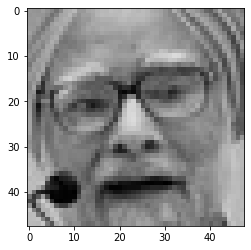

In [ ]:
sample_angry = tf.keras.preprocessing.image.load_img("/content/data/train/angry/train_angry_1.jpg", target_size=(48,48))
plt.imshow(sample_angry)

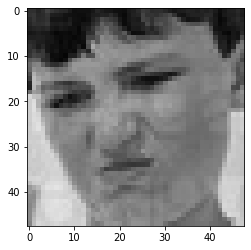

In [ ]:
sample_disgust = tf.keras.preprocessing.image.load_img("/content/data/train/disgust/train_disgust_1.jpg", target_size=(48,48))
plt.imshow(sample_disgust)

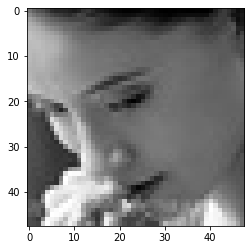

In [ ]:
sample_feart = tf.keras.preprocessing.image.load_img("/content/data/train/fear/train_fear_1.jpg", target_size=(48,48))
plt.imshow(sample_feart)

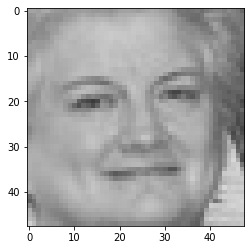

In [ ]:
sample_happy = tf.keras.preprocessing.image.load_img("/content/data/train/happy/train_happy_1.jpg", target_size=(48,48))
plt.imshow(sample_happy)

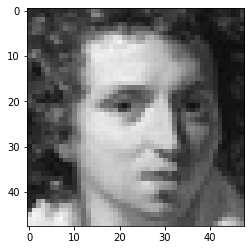

In [ ]:
sample_neutral = tf.keras.preprocessing.image.load_img("/content/data/train/neutral/train_neutral_1.jpg", target_size=(48,48))
plt.imshow(sample_neutral)

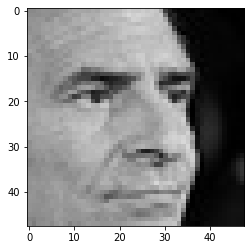

In [ ]:
sample_sad = tf.keras.preprocessing.image.load_img("/content/data/train/sad/train_sad_1.jpg", target_size=(48,48))
plt.imshow(sample_sad)

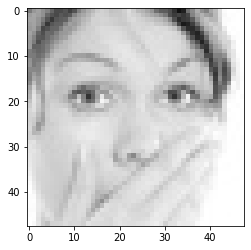

In [ ]:
sample_surprise = tf.keras.preprocessing.image.load_img("/content/data/train/surprise/train_surprise_1.jpg", target_size=(48,48))
plt.imshow(sample_surprise)

Plot the bar graph for the number of images in each class for both training and testing data

In [ ]:
# Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [ ]:
#Pass the images through the generator

def ImageData(batchSize=32, colorMode = 'rgb', targetSize = [48,48]):
  trainImageData = train_generator.flow_from_directory("/content/data/train/",
                                                     batch_size= batchSize, #how much images to give per iteration in an epoch
                                                     class_mode= "categorical", #Incase of multi-class classification, "categorical"
                                                     target_size= targetSize, #Ensures all images are of same size (resizing)
                                                     color_mode = colorMode
                                                     )
  
  testImageData = test_generator.flow_from_directory("/content/data/test/",
                                                     batch_size= batchSize, #how much images to give per iteration in an epoch
                                                     class_mode= "categorical", #Incase of multi-class classification, "categorical"
                                                     target_size= targetSize, #Ensures all images are of same size (resizing)
                                                     color_mode = colorMode
                                                     )
  return trainImageData, testImageData

In [ ]:
trainImageData_plot, testImageData_plot = ImageData()
train_unique, train_counts = np.unique(trainImageData_plot.labels, return_counts=True)
test_unique, test_counts = np.unique(testImageData_plot.labels, return_counts=True)

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


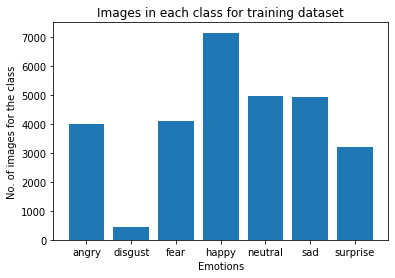

In [ ]:
plt.bar(trainImageData_plot.class_indices.keys(), train_counts )
plt.xlabel("Emotions")
plt.ylabel("No. of images for the class")
plt.title("Images in each class for training dataset")
plt.show()

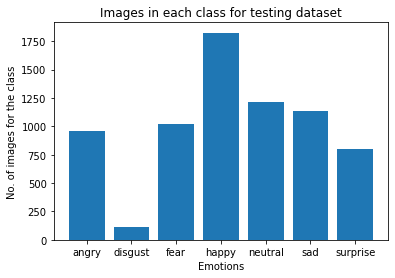

In [ ]:
plt.bar(testImageData_plot.class_indices.keys(), test_counts )
plt.xlabel("Emotions")
plt.ylabel("No. of images for the class")
plt.title("Images in each class for testing dataset")
plt.show()



---



---



Build 3 CNN model with: 


---



---



1. CNN Architecture:

  1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers  
  2. Use Relu as activation functions
  3. Take loss function as categorical cross-entropy
  4. Take Adam as an optimizer
  5. Use early-stop with two patients and monitor for validation loss
  6. Try with ten number epochs
  7. Train the model using the generator and test the accuracy of the test data at every epoch
  8. Plot the training and validation accuracy, and the loss
  9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Importing and efining an initialiser function
from tensorflow.keras import initializers
Initializer = tf.keras.initializers.GlorotUniform()

In [ ]:
number_of_classes = len(train_unique)

In [ ]:
# model 1 building
def CNN_1(trainImageData):
  model=Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=trainImageData.image_shape,activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(4608,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(576,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(72,activation='relu'))
  # model.add(Dropout(0.2))

  # Adding the output Layer. kernel_initializer has also been defined addtionally
  model.add(Dense(number_of_classes,activation='softmax', kernel_initializer=Initializer))

  model.summary()

  # compile the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy', Precision(), Recall()])

  return model

In [ ]:
# Defining the callback funtion with patience = 2, we have also kept the restore_best_weights as true
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode = "min" )

In [ ]:
# Defining the image data generator for batch size = 32, color mode = 'rgb' and targetSize = [48,48])
batchSize_CNN1 = 32
trainImageData_1_RGB, testImageData_1_RGB = ImageData(batchSize_CNN1)

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Creating the model and loading it onto the model1_RGB
model1_RGB = CNN_1(trainImageData_1_RGB)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 4608)              2

In [ ]:
# Fitting the model and validating with the train and test data for 10 epoch. The results are then stored onto the history variable.
history_model1_RGB = model1_RGB.fit(trainImageData_1_RGB,
               validation_data=testImageData_1_RGB,
               epochs=10,
               steps_per_epoch=len(trainImageData_1_RGB.filenames) // batchSize_CNN1,
               validation_steps=len(testImageData_1_RGB.filenames) // batchSize_CNN1,
               callbacks=[callback])

Epoch 1/10
900/900 [==============================] - 55s 46ms/step - loss: 1.9441 - accuracy: 0.2181 - precision: 0.2364 - recall: 0.0210 - val_loss: 1.8828 - val_accuracy: 0.2290 - val_precision: 0.2618 - val_recall: 0.0324
Epoch 2/10
900/900 [==============================] - 39s 43ms/step - loss: 1.8191 - accuracy: 0.2412 - precision: 0.2746 - recall: 0.0042 - val_loss: 1.7973 - val_accuracy: 0.2659 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 38s 42ms/step - loss: 1.7787 - accuracy: 0.2599 - precision: 0.3893 - recall: 0.0018 - val_loss: 1.7277 - val_accuracy: 0.3006 - val_precision: 0.6842 - val_recall: 0.0018
Epoch 4/10
900/900 [==============================] - 37s 41ms/step - loss: 1.7625 - accuracy: 0.2688 - precision: 0.3960 - recall: 0.0028 - val_loss: 1.7473 - val_accuracy: 0.2741 - val_precision: 0.5995 - val_recall: 0.0321
Epoch 5/10
900/900 [==============================] - 37s 41ms/step - loss: 1.7391 - acc

In [ ]:
# The f1 function defined below calculates the f1 score based on the precision and recall values from the history variable
def f1(p,r):
  f1_score = []
  for i in range(len(p)):
    if (p[i]+r[i]==0):
      f1_score.append(0)
    else:
      f1_score.append(2*(p[i]*r[i])/(p[i]+r[i]))
  return f1_score

In [ ]:
# The plolt function defined below plots the loss, accuracy, precision and recall values from train dataset against the validation 
# dataset for each Epoch
def plot(history):

  loss = list(history.items())[0][1]
  accuracy = list(history.items())[1][1]
  precision = list(history.items())[2][1]
  recall = list(history.items())[3][1]

  val_loss = list(history.items())[4][1]
  val_accuracy = list(history.items())[5][1]
  val_precision = list(history.items())[6][1]
  val_recall = list(history.items())[7][1]


  f1_train = f1(precision,recall)
  f1_val = f1(val_precision,val_recall)

  plt.figure(figsize=(8, 4))
  plt.plot(loss,'-o')
  plt.plot(val_loss,'-o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training','Validation'])
  plt.title('Train vs Valid Loss') 
  plt.show()

  plt.figure(figsize=(8, 4))
  plt.plot(accuracy,'-o')
  plt.plot(val_accuracy,'-o')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training','Validation'])
  plt.title('Train vs Valid Accuracy') 
  plt.show()

  plt.figure(figsize=(8, 4))
  plt.plot(precision,'-o')
  plt.plot(val_precision,'-o')
  plt.xlabel('Epoch')
  plt.ylabel('Precision')
  plt.legend(['Training','Validation'])
  plt.title('Train vs Valid Pprecision') 
  plt.show()

  plt.figure(figsize=(8, 4))
  plt.plot(recall,'-o')
  plt.plot(val_recall,'-o')
  plt.xlabel('Epoch')
  plt.ylabel('Recall')
  plt.legend(['Training','Validation'])
  plt.title('Train vs Valid Recall') 
  plt.show()

  plt.figure(figsize=(8, 4))
  plt.plot(f1_train,'-o')
  plt.plot(f1_val,'-o')
  plt.xlabel('Epoch')
  plt.ylabel('F1 Score')
  plt.legend(['Training','Validation'])
  plt.title('Train vs Valid F1 Score') 
  plt.show()

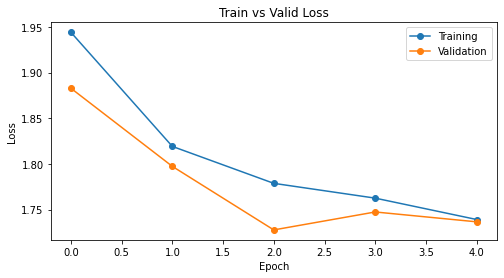

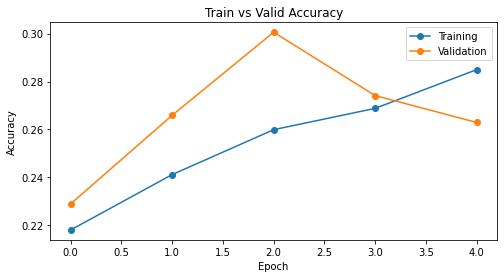

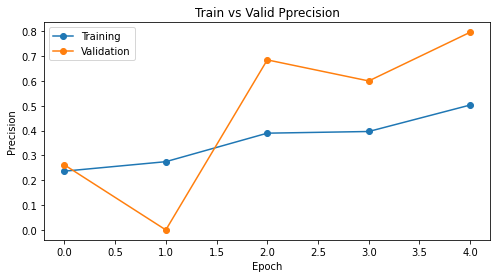

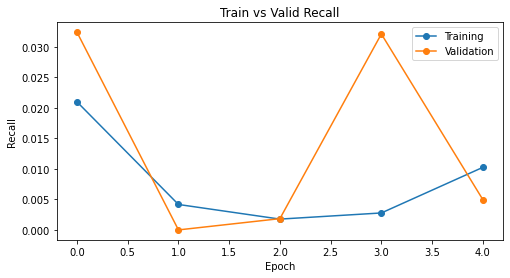

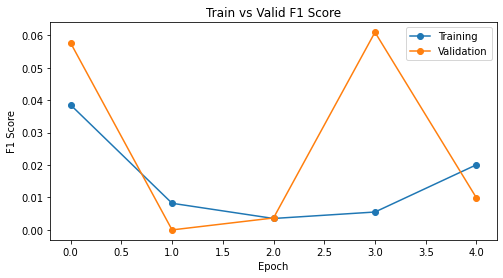

In [ ]:
# Plot for model1_RGB calls the plot function with the history as the argument
plot(history_model1_RGB.history)

In [ ]:
# Defining the image data generator for batch size = 32, color mode = 'grayscale' and targetSize = [48,48])
batchSize_CNN1 = 32
trainImageData_1_Gray, testImageData_1_Gray = ImageData(batchSize_CNN1, 'grayscale')

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model1_Gray = CNN_1(trainImageData_1_Gray)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 4608)             

In [ ]:
history_model1_Gray = model1_Gray.fit(trainImageData_1_Gray, 
          validation_data=testImageData_1_Gray,
          epochs=10,
          steps_per_epoch=len(trainImageData_1_Gray.filenames) // batchSize_CNN1,
          validation_steps=len(testImageData_1_Gray.filenames) // batchSize_CNN1,
          callbacks=[callback])

Epoch 1/10
900/900 [==============================] - 28s 30ms/step - loss: 1.9371 - accuracy: 0.2138 - precision_1: 0.2249 - recall_1: 0.0177 - val_loss: 1.8143 - val_accuracy: 0.2670 - val_precision_1: 0.4082 - val_recall_1: 0.0028
Epoch 2/10
900/900 [==============================] - 26s 29ms/step - loss: 1.8175 - accuracy: 0.2440 - precision_1: 0.2812 - recall_1: 0.0025 - val_loss: 1.9983 - val_accuracy: 0.1688 - val_precision_1: 0.3575 - val_recall_1: 0.0447
Epoch 3/10
900/900 [==============================] - 29s 32ms/step - loss: 1.7761 - accuracy: 0.2616 - precision_1: 0.3772 - recall_1: 0.0015 - val_loss: 1.7474 - val_accuracy: 0.2838 - val_precision_1: 0.4470 - val_recall_1: 0.0138
Epoch 4/10
900/900 [==============================] - 27s 30ms/step - loss: 1.7547 - accuracy: 0.2781 - precision_1: 0.4480 - recall_1: 0.0043 - val_loss: 1.7285 - val_accuracy: 0.3175 - val_precision_1: 0.4842 - val_recall_1: 0.1462
Epoch 5/10
900/900 [==============================] - 27s 30ms/s

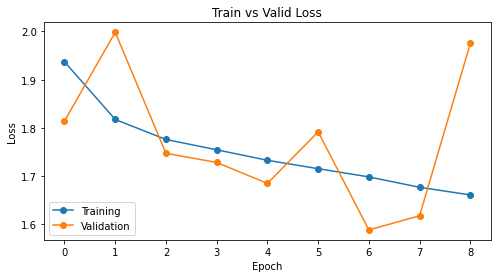

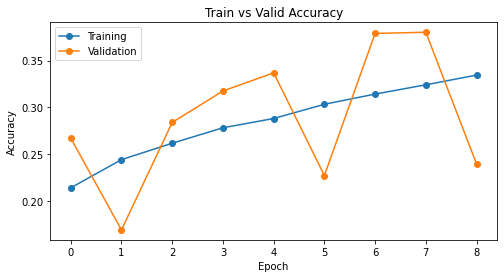

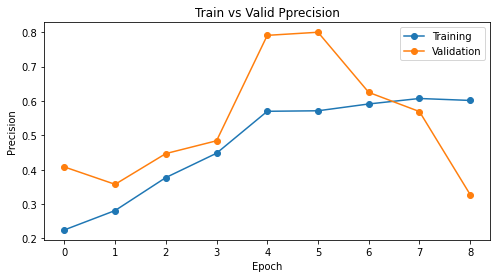

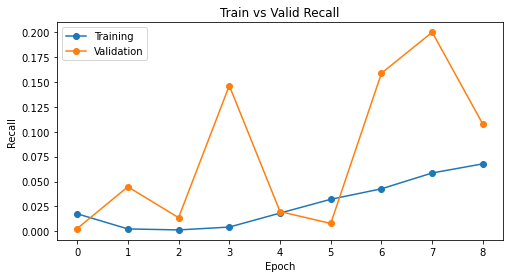

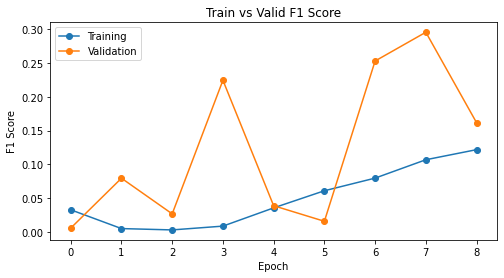

In [ ]:
# Plot for model1_Gray
plot(history_model1_Gray.history)



---



---



2. Customized CNN Architecture:

  1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers on the top of the first model architecture to improve the accuracy

  2. Change the batch size activation function and optimizer as rmsprop and observe if the accuracy increases

  3. Take the loss function as categorical cross-entropy

  4. Use early stopping with the patience of two epochs and monitoring of validation loss

  5. Try with ten number epochs

  6. Train the model using the generator and test the accuracy of the test data at every epoch

  7. Plot the training and validation accuracy, and the loss

  8. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
# model 2 building
def CNN_2(trainImageData):
  model=Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=trainImageData.image_shape,activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(576,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(144,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(36,activation='relu'))
  model.add(Dropout(0.2))

  # Adding the output Layer. kernel_initializer has also been defined addtionally
  model.add(Dense(number_of_classes,activation='softmax', kernel_initializer=Initializer))

  model.summary()

  #compile the model
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy', Precision(), Recall()])

  return model

In [ ]:
# Defining the callback funtion with patience = 2, we have also kept the restore_best_weights as true
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode = "min")

In [ ]:
# Defining the image data generator for batch size = 64, color mode = 'rgb' and targetSize = [48,48])
batchSize_CNN2 = 64
trainImageData_2_RGB, testImageData_2_RGB = ImageData(batchSize_CNN2)

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model2_RGB = CNN_2(trainImageData_2_RGB)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 16)        

In [ ]:
history_model2_RGB = model2_RGB.fit(trainImageData_2_RGB,
               validation_data=testImageData_2_RGB,
               epochs=10,
               steps_per_epoch=len(trainImageData_2_RGB.filenames) // batchSize_CNN2,
               validation_steps=len(testImageData_2_RGB.filenames) // batchSize_CNN2,
               callbacks=[callback])

Epoch 1/10
450/450 [==============================] - 36s 75ms/step - loss: 1.9133 - accuracy: 0.2151 - precision_2: 0.1927 - recall_2: 0.0087 - val_loss: 2.1714 - val_accuracy: 0.2393 - val_precision_2: 0.2077 - val_recall_2: 0.0054
Epoch 2/10
450/450 [==============================] - 34s 76ms/step - loss: 1.8093 - accuracy: 0.2433 - precision_2: 0.1667 - recall_2: 3.4775e-04 - val_loss: 1.9670 - val_accuracy: 0.1702 - val_precision_2: 0.1818 - val_recall_2: 0.0037
Epoch 3/10
450/450 [==============================] - 34s 74ms/step - loss: 1.7794 - accuracy: 0.2620 - precision_2: 0.4265 - recall_2: 0.0010 - val_loss: 1.7421 - val_accuracy: 0.2795 - val_precision_2: 0.5190 - val_recall_2: 0.0291
Epoch 4/10
450/450 [==============================] - 34s 75ms/step - loss: 1.7543 - accuracy: 0.2742 - precision_2: 0.4903 - recall_2: 0.0044 - val_loss: 1.7309 - val_accuracy: 0.3060 - val_precision_2: 0.4898 - val_recall_2: 0.0615
Epoch 5/10
450/450 [==============================] - 35s 79

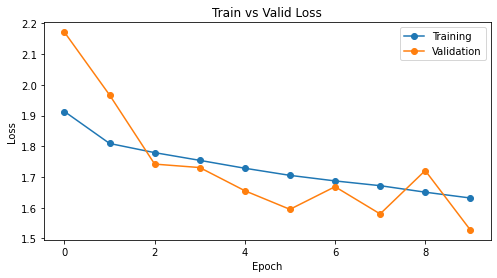

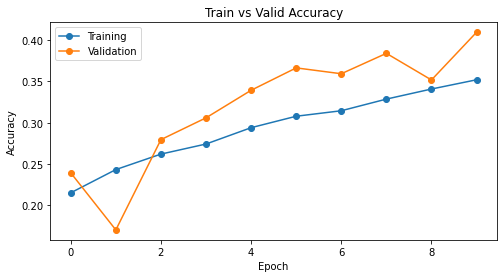

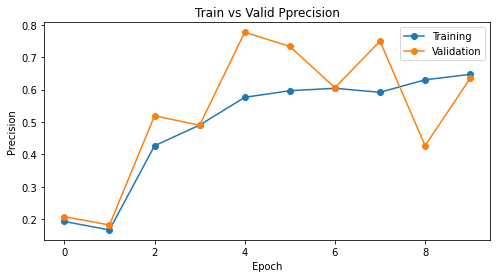

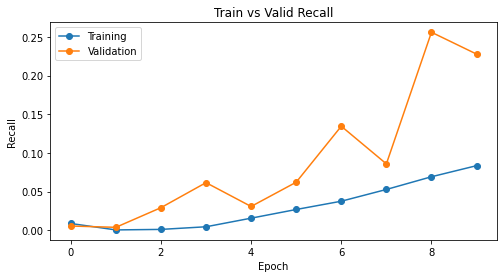

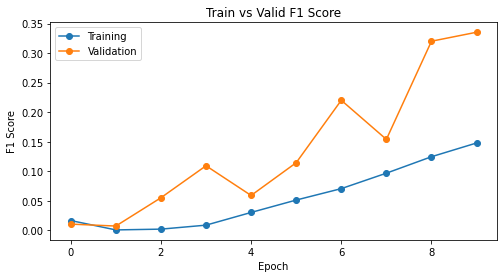

In [ ]:
# Plot for model2_RGB
plot(history_model2_RGB.history)

In [ ]:
# Defining the image data generator for batch size = 32, color mode = 'grayscale' and targetSize = [48,48])
batchSize_CNN2 = 64
trainImageData_2_Gray, testImageData_2_Gray = ImageData(batchSize_CNN2, 'grayscale')

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model2_Gray = CNN_2(trainImageData_2_Gray)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 16)        

In [ ]:
history_model2_Gray = model2_Gray.fit(trainImageData_2_Gray, 
          validation_data=testImageData_2_Gray,
          epochs=10,
          steps_per_epoch=len(trainImageData_2_Gray.filenames) // batchSize_CNN2,
          validation_steps=len(testImageData_2_Gray.filenames) // batchSize_CNN2,
          callbacks=[callback])

Epoch 1/10
450/450 [==============================] - 23s 48ms/step - loss: 1.9090 - accuracy: 0.2193 - precision_3: 0.2311 - recall_3: 0.0101 - val_loss: 1.9604 - val_accuracy: 0.1614 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/10
450/450 [==============================] - 21s 47ms/step - loss: 1.8038 - accuracy: 0.2449 - precision_3: 0.3226 - recall_3: 6.9551e-04 - val_loss: 1.7640 - val_accuracy: 0.2658 - val_precision_3: 0.4000 - val_recall_3: 5.6818e-04
Epoch 3/10
450/450 [==============================] - 21s 48ms/step - loss: 1.7791 - accuracy: 0.2651 - precision_3: 0.3617 - recall_3: 0.0018 - val_loss: 1.7284 - val_accuracy: 0.2955 - val_precision_3: 0.4333 - val_recall_3: 0.0111
Epoch 4/10
450/450 [==============================] - 22s 48ms/step - loss: 1.7517 - accuracy: 0.2809 - precision_3: 0.4923 - recall_3: 0.0067 - val_loss: 1.7186 - val_accuracy: 0.2967 - val_precision_3: 0.6849 - val_recall_3: 0.0284
Epoch 5/10
450/450 [============================

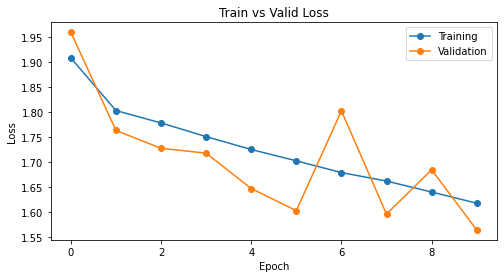

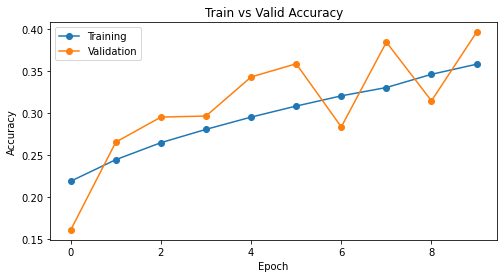

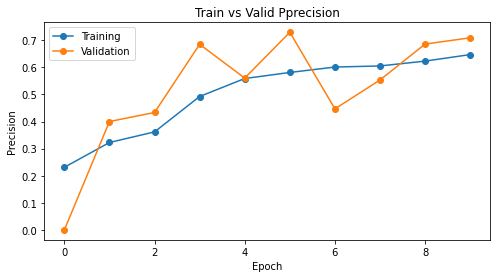

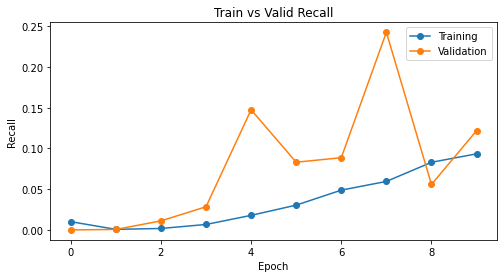

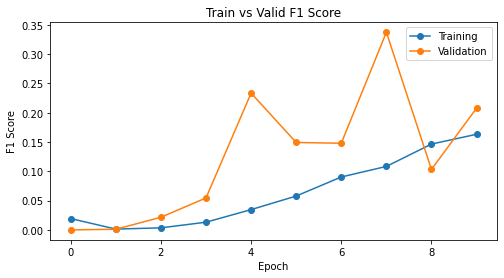

In [ ]:
# Plot for model2_Gray
plot(history_model2_Gray.history)



---



---



3. Transfer Learning:

  1. Prepare the data for the transfer learning algorithm 
  
  2. Freeze the top layers of the pre-trained model

  3. Add a dense layer at the end of the pre-trained model followed by a dropout layer

  4. Add the final output layer with the SoftMax activation function

  5. Take the loss function as categorical cross-entropy

  6. Take Adam as an optimizer

  7. Use early stopping with the patience of two epochs and monitor the validation loss which is set as minimum mode

  8. Try with fifteen number epochs

  9. Train the model using the generator and test the accuracy of the test data at every epoch

  10. Plot the training and validation accuracy, and the loss

  11. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good


---



---



For the transfer learning, I have decided to go with the VGG16 api in tensorflow.
The VGG16 requires a specific kind of input preprocessing which is done by *preprocess_input*. <br>
Additionally, the input for this model has to be (224, 224, 3) or (3, 224, 224)  where the size of the image is 224x224 and  the nuber of channels is 3<br>
Thus we change the size of the images to 224x224 in both the cases. <br>
In order to maintain the number of channels in the greyscale model as 3, we add a 2D conv layer with 3 filters which essentially sends the input over 3 channels

In [ ]:
# Redefining the train and test generator to include the preprocessor fucntion for VGG16
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    horizontal_flip=True, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
# model 3 building
def CNN_3(trainImageData):
  vgg = tf.keras.applications.vgg16.VGG16(weights="imagenet",
                                        include_top=True)

  # Freezing all the layers in the vgg 
  for layer in vgg.layers:
    layer.trainable=False
  
  model = Sequential(vgg)

  # Adding a Flatten layer
  model.add(Flatten())

  # Adding a dense layer
  model.add(Dense(100,activation='relu'))

  # Adding the dropout layer
  model.add(Dropout(0.2))

  # Adding the output Layer. kernel_initializer has also been defined addtionally
  model.add(Dense(number_of_classes,activation='softmax', kernel_initializer=Initializer))

  model.summary()

  #compile the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy', Precision(), Recall()])

  return model


In [ ]:
# Defining the callback funtion with patience = 2, we have also kept the restore_best_weights as true
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode = "min")

In [ ]:
# Defining the image data generator for batch size = 32, color mode = 'rgb' and targetSize = [224,224])
batchSize_CNN3 = 32
trainImageData_3_RGB, testImageData_3_RGB = ImageData(batchSize_CNN3, 'rgb', [224,224])

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model3_RGB = CNN_3(trainImageData_3_RGB)

553476096/553467096 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               100100    
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 7)                 707       
                                                                 
Total params: 138,458,351
Trainable params: 100,807
Non-trainable params: 138,357,544
_________________________________

In [ ]:
history_model3_RGB = model3_RGB.fit(trainImageData_3_RGB,
               validation_data=testImageData_3_RGB,
               epochs=15,
               steps_per_epoch=len(trainImageData_3_RGB.filenames) // batchSize_CNN3,
               validation_steps=len(testImageData_3_RGB.filenames) // batchSize_CNN3,
               callbacks=[callback])

Epoch 1/15
900/900 [==============================] - 381s 419ms/step - loss: 1.8029 - accuracy: 0.2508 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 1.7706 - val_accuracy: 0.2625 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/15
900/900 [==============================] - 375s 417ms/step - loss: 1.7693 - accuracy: 0.2633 - precision_4: 0.3333 - recall_4: 3.4737e-05 - val_loss: 1.7527 - val_accuracy: 0.2929 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/15
900/900 [==============================] - 374s 415ms/step - loss: 1.7536 - accuracy: 0.2777 - precision_4: 0.4915 - recall_4: 0.0010 - val_loss: 1.7399 - val_accuracy: 0.2899 - val_precision_4: 0.4667 - val_recall_4: 9.9432e-04
Epoch 4/15
900/900 [==============================] - 373s 415ms/step - loss: 1.7456 - accuracy: 0.2832 - precision_4: 0.5000 - recall_4: 0.0014 - val_loss: 1.7319 - val_accuracy: 0.3060 - val_precision_4: 0.6000 - val_recall_4: 0.0013
Epoch 5/15
900/900 [====

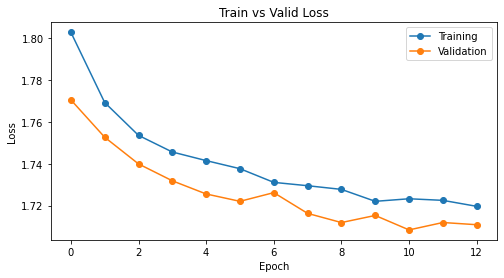

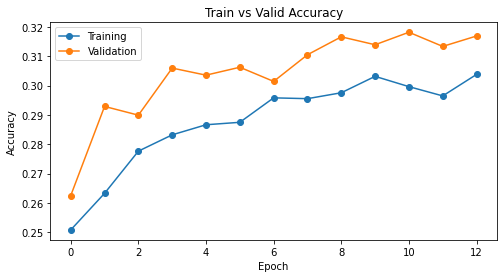

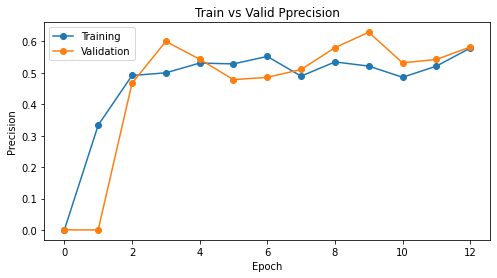

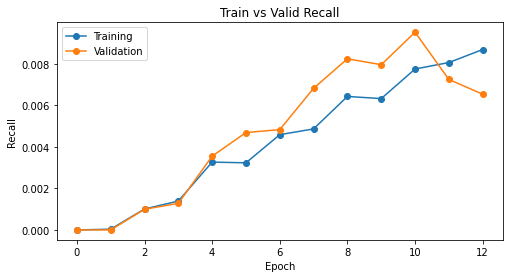

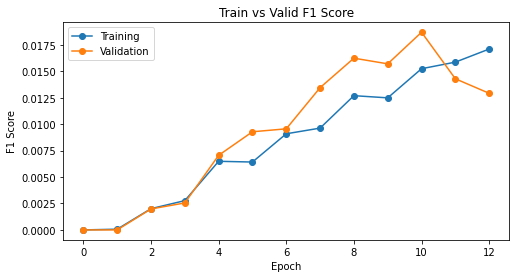

In [ ]:
# Plot for model3_RGB
plot(history_model3_RGB.history)



---



---



As mentioned earlier, for the grayscale image, we change the size of the images to 224x224 and we add a 2D conv layer with 3 filters which essentially sends the input over 3 channels. This is done to send the input as required by VGG16

In [ ]:
# model 3 Grayscale building
def CNN_3_Gray(trainImageData):
  vgg = tf.keras.applications.vgg16.VGG16(weights="imagenet",
                                        include_top=True)

  # Freezing all the layers in the vgg 
  for layer in vgg.layers:
    layer.trainable=False

  # Defining the input shape
  input_tensor = Input(shape=(224,224,1))

  # Adding the conv 2D layer to match the nuymber of channels required for VGG16 
  model = Sequential()
  model.add(input_tensor)
  model.add(Conv2D(filters=3, kernel_size=(1,1),padding='same'))
  model.add(vgg)


  # Adding a Flatten layer
  model.add(Flatten())

  # Adding a dense layer
  model.add(Dense(100,activation='relu'))

  # Adding the dropout layer
  model.add(Dropout(0.2))

  # Adding the output Layer. kernel_initializer has also been defined addtionally
  model.add(Dense(number_of_classes,activation='softmax', kernel_initializer=Initializer))

  model.summary()

  #compile the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy', Precision(), Recall()])

  return model


In [ ]:
# Defining the callback funtion with patience = 2, we have also kept the restore_best_weights as true
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode = "min")

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [ ]:
# Defining the image data generator for batch size = 32, color mode = 'grayscale' and targetSize = [224,224])
batchSize_CNN3 = 32
trainImageData_3_Gray, testImageData_3_Gray = ImageData(batchSize_CNN3, 'grayscale', [224,224])

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model3_Gray = CNN_3_Gray(trainImageData_3_Gray)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 3)       6         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_5 (Flatten)         (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               100100    
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 7)                 707       
                                                                 
Total params: 138,458,357
Trainable params: 100,813
No

In [ ]:
history_model3_Gray = model3_Gray.fit(trainImageData_3_Gray, 
          validation_data=testImageData_3_Gray,
          epochs=15,
          steps_per_epoch=len(trainImageData_3_Gray.filenames) // batchSize_CNN3,
          validation_steps=len(testImageData_3_Gray.filenames) // batchSize_CNN3,
          callbacks=[callback])

Epoch 1/15
900/900 [==============================] - 308s 339ms/step - loss: 1.8175 - accuracy: 0.2469 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.7981 - val_accuracy: 0.2581 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/15
900/900 [==============================] - 307s 341ms/step - loss: 1.7904 - accuracy: 0.2509 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.7787 - val_accuracy: 0.2599 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/15
900/900 [==============================] - 310s 344ms/step - loss: 1.7818 - accuracy: 0.2552 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.7730 - val_accuracy: 0.2626 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/15
900/900 [==============================] - 309s 344ms/step - loss: 1.7779 - accuracy: 0.2583 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.7751 - val_accuracy: 0.2665 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0

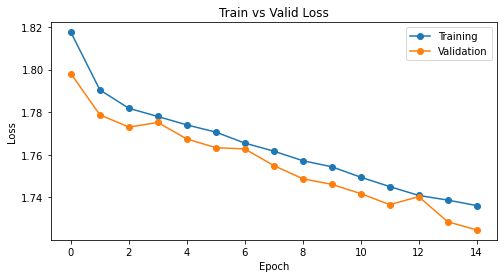

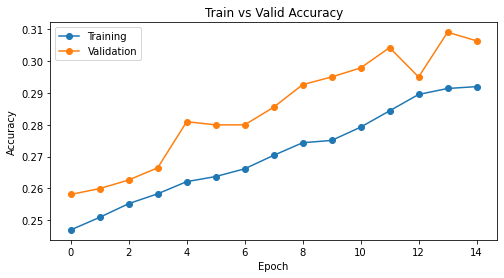

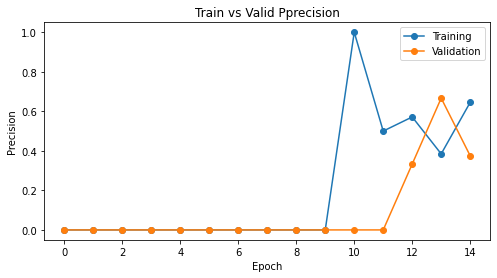

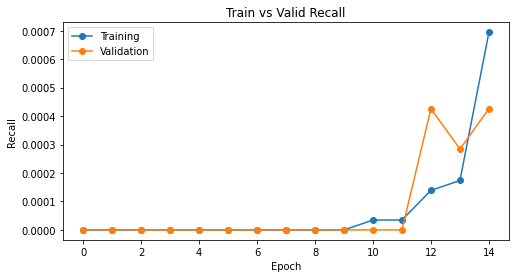

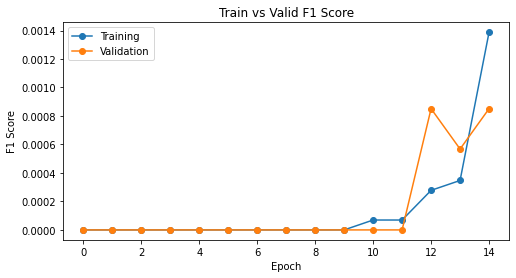

In [ ]:
# Plot for model3_Gray
plot(history_model3_Gray.history)



---



---



Final Steps:

1. Compare all the models on the basis of accuracy, precision, recall, and f1-score

2. Write at least 3 more things to increase the model’s performance




1. 	Comparison of all the models on the basis of accuracy, precision, recall, and f1-score, the models with the customised CCN seems to be giving the best performance.

  a. 	Loss: model2_RGB and model2_Gray are equally good with low loss in test and validation

  b .	Accuracy: model2_RGB and model2_Gray are having the most consistency and highest consistent accuracy in test and validation

 c.	Precision: Though highest value for precision were almost at 0.8 for both model1 and mode2, considering the overall trend for test and validation values, the model2_RGB seems to be giving the best performance

  d. Recall: Though highest value for recall was for model1_RGB, considering the overall trend for test and validation values, the model2_RGB seems to be giving the best performance

  e. F1 score: model2_RGB and model2_Gray seems to be best from the models with highest f1 score in test and validation
The model 2 and 3 seem to be on an increasing trend and greater number of epochs might have helped the models perform better


2.	Some ways to increase the model performance are below:

 a. Increasing the number of data entries
 
 b.	Increasing the number of hidden layers

 c.	Trying out different optimisers, loss function, activation function

 d.	Adjusting the batch size, number of epoch

 e.	Changing the learning rates 


In [ ]:
print("END")

END
